In [65]:
import pandas as pd
import ast
import matplotlib.pyplot as plt

In [60]:
file_path = './CSV/0010_jackson-databind_dependenciesReleaseWise_DETAILS.csv'
df = pd.read_csv(file_path)

In [61]:
df

,releaseID,releaseUnixTime,releaseVersion,releaseDate,dependencyCount,dependencyArtIDs
0,"""com.fasterxml.jackson.core:jackson-databind:2...",1329638721000,"""2.0.0-RC1""","""2012-02-19T08:05:21Z""",8,"[""cglib:cglib"", ""joda-time:joda-time"", ""org.hi..."
1,"""com.fasterxml.jackson.core:jackson-databind:2...",1331017328000,"""2.0.0-RC2""","""2012-03-06T07:02:08Z""",7,"[""org.codehaus.groovy:groovy"", ""cglib:cglib"", ..."
2,"""com.fasterxml.jackson.core:jackson-databind:2...",1332461953000,"""2.0.0-RC3""","""2012-03-23T00:19:13Z""",7,"[""org.codehaus.groovy:groovy"", ""com.google.col..."
3,"""com.fasterxml.jackson.core:jackson-databind:2...",1332702684000,"""2.0.0""","""2012-03-25T19:11:24Z""",7,"[""cglib:cglib"", ""junit:junit"", ""org.hibernate:..."
4,"""com.fasterxml.jackson.core:jackson-databind:2...",1335233879000,"""2.0.1""","""2012-04-24T02:17:59Z""",7,"[""junit:junit"", ""com.google.collections:google..."
...,...,...,...,...,...,...
194,"""com.fasterxml.jackson.core:jackson-databind:2...",1710010452000,"""2.16.2""","""2024-03-09T18:54:12Z""",12,"[""junit:junit"", ""org.powermock:powermock-modul..."
195,"""com.fasterxml.jackson.core:jackson-databind:2...",1710280412000,"""2.17.0""","""2024-03-12T21:53:32Z""",12,"[""com.google.guava:guava-testlib"", ""org.openjd..."
196,"""com.fasterxml.jackson.core:jackson-databind:2...",1714680651000,"""2.12.7.2""","""2024-05-02T20:10:51Z""",7,"[""org.powermock:powermock-core"", ""junit:junit""..."
197,"""com.fasterxml.jackson.core:jackson-databind:2...",1714874876000,"""2.17.1""","""2024-05-05T02:07:56Z""",12,"[""org.junit.vintage:junit-vintage-engine"", ""ju..."


In [62]:
df['dependencyArtIDs'] = df['dependencyArtIDs'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)


df['releaseDate'] = df['releaseDate'].str.strip('"')
df['releaseDate'] = pd.to_datetime(df['releaseDate'], format='%Y-%m-%dT%H:%M:%SZ')
df['year'] = df['releaseDate'].dt.year

df['addedDependency'] = 0
df['removedDependency'] = 0

df.at[0, 'addedDependency'] = len(set(df.loc[0, 'dependencyArtIDs']))

for i in range(1, len(df)):
    #print(i)
    prev_dependency = set(df.loc[i-1, 'dependencyArtIDs'])
    #print(prev_dependency)
    curr_dependency = set(df.loc[i, 'dependencyArtIDs'])
    # print(curr_dependency)

    added_dep = curr_dependency - prev_dependency
    removed_dep = prev_dependency - curr_dependency
    
    df.at[i, 'addedDependency'] = len(added_dep)
    df.at[i, 'removedDependency'] = len(removed_dep)

data = df[['year', 'addedDependency', 'removedDependency']]


In [63]:
data

,year,addedDependency,removedDependency
0,2012,8,0
1,2012,0,1
2,2012,0,0
3,2012,0,0
4,2012,0,0
...,...,...,...
194,2024,3,3
195,2024,3,3
196,2024,3,8
197,2024,8,3


In [64]:
yearly_data = data.groupby('year')[['addedDependency', 'removedDependency']].sum().reset_index()

print(yearly_data)

    year  addedDependency  removedDependency
0   2012                8                  2
1   2013                0                  0
2   2014                1                  0
3   2015               16                 17
4   2016                7                  6
5   2017                5                  5
6   2018                4                  5
7   2019               13                 12
8   2020               27                 27
9   2021                7                  7
10  2022                3                  1
11  2023                5                  2
12  2024               21                 21


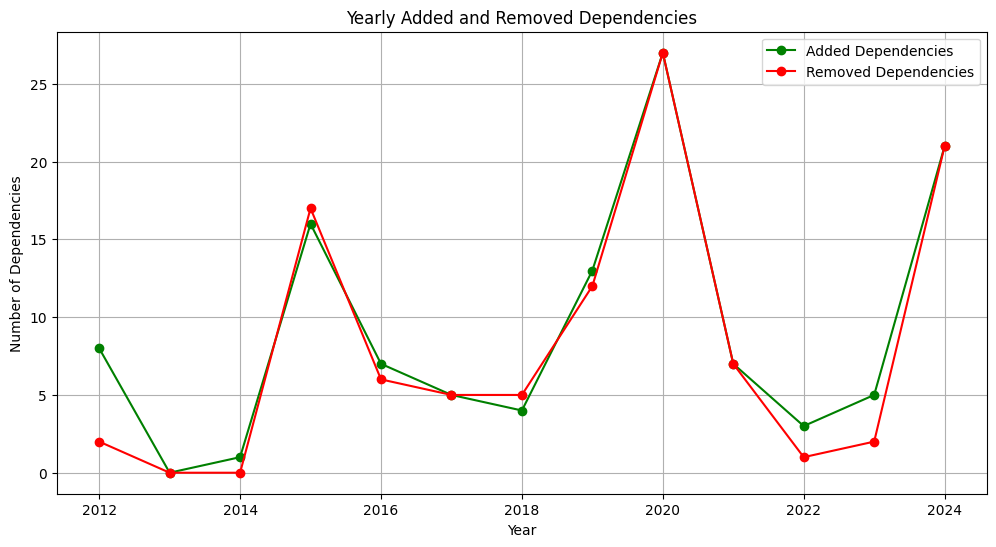

In [67]:
plt.figure(figsize = (12,6))
plt.plot(yearly_data['year'],yearly_data['addedDependency'], marker='o', label='Added Dependencies', color='green')
plt.plot(yearly_data['year'],yearly_data['removedDependency'], marker='o', label='Removed Dependencies', color='red')

plt.title('Yearly Added and Removed Dependencies')
plt.xlabel('Year')
plt.ylabel('Number of Dependencies')
plt.legend()
plt.grid(True)
plt.show()